In [8]:
import numpy as np
import pytest
from sklearn.linear_model import LinearRegression, Ridge
import random as rd

In [7]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f1/7d/2e562207176a5dcdad513085670674bb11ffaf37e1393eacb6d7fb502481/scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 435.7 kB/s eta 0:00:22
   ---------------------------------------- 0.1/9.2 MB 550.5 kB/s eta 0:00:17
   ---------------------------------------- 0.1/9.2 MB 550.5 kB/s 

#### Linear regression

In [12]:
class LinearRegr:
    def fit(self, X, Y):
        n, m = X.shape
        newX = np.hstack((np.ones((n, 1)), X))
        self.theta = np.linalg.inv(newX.T @ newX) @ newX.T @ Y
        return self
    
    def predict(self, X):
        k, m = X.shape
        newX = np.hstack((np.ones((k, 1)), X))
        predictions = newX @ self.theta
        return predictions

In [5]:
def test_RegressionInOneDim():
    X = np.array([1,3,2,5]).reshape((4,1))
    Y = np.array([2,5, 3, 8])
    a = np.array([1,2,10]).reshape((3,1))
    expected = LinearRegression().fit(X, Y).predict(a)
    actual = LinearRegr().fit(X, Y).predict(a)
    assert list(actual) == pytest.approx(list(expected))

def test_RegressionInThreeDim():
    X = np.array([1,2,3,5,4,5,4,3,3,3,2,5]).reshape((4,3))
    Y = np.array([2,5, 3, 8])
    a = np.array([1,0,0, 0,1,0, 0,0,1, 2,5,7, -2,0,3]).reshape((5,3))
    expected = LinearRegression().fit(X, Y).predict(a)
    actual = LinearRegr().fit(X, Y).predict(a)
    assert list(actual) == pytest.approx(list(expected))

In [13]:
test_RegressionInOneDim()

In [14]:
test_RegressionInThreeDim()

#### Ridge Regression

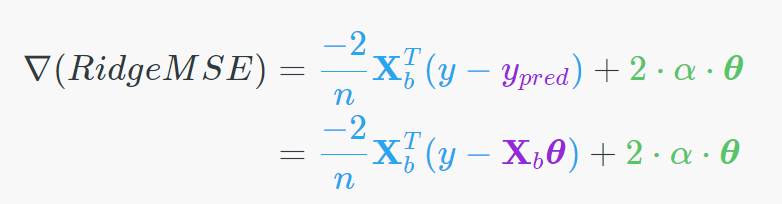

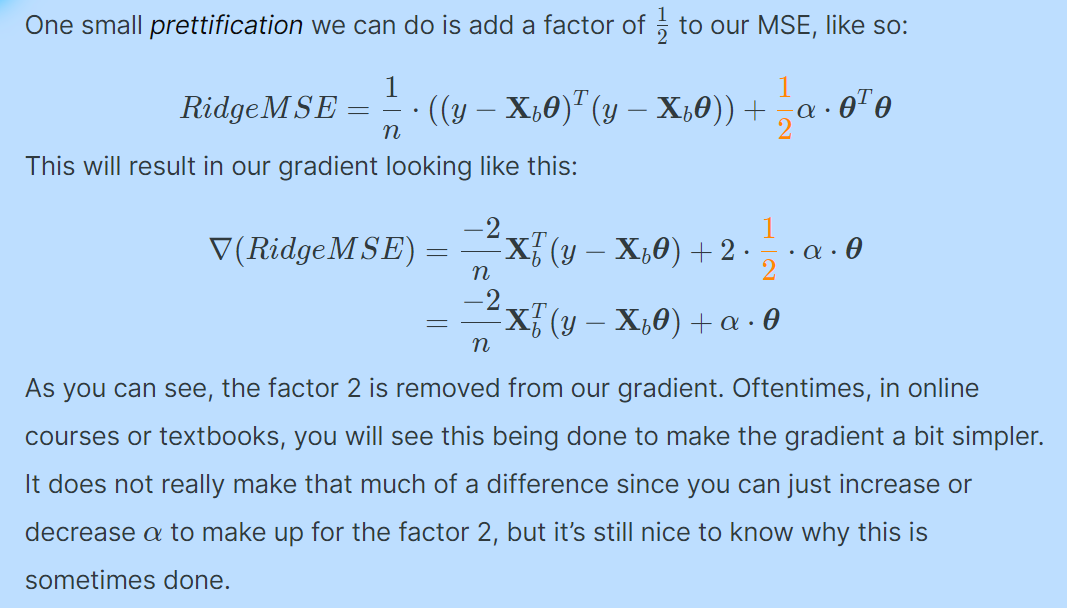

In [48]:
class RidgeRegr:
    def __init__(self, alpha = 0.0):
        self.alpha = alpha

    def fit(self, X, Y, l, c):
        n, m = X.shape
        newX = np.hstack((np.ones((n, 1)), X))
        theta = np.zeros((m+1))
        self.theta = self.iterative(newX, Y, theta, l, c)
        return self

    def fit2(self, X, Y):
        n, m = X.shape
        newX = np.hstack((np.ones((n, 1)), X))
        I = np.identity(m+1)
        I[0][0] = 0
        self.theta = np.linalg.inv(newX.T @ newX + self.alpha * I) @ newX.T @ Y
        return self
    
    def predict(self, X):
        k, m = X.shape
        newX = np.hstack((np.ones((k, 1)), X))
        predictions = newX @ self.theta
        return predictions
    
    def cost_gradient(self, X, Y, theta):
        diff = Y - X @ theta
        return  -(2 / len(Y)) * X.T @ diff + self.alpha * theta
        
    def iterative(self, X, Y, theta, l, c):
        for _ in range(l):
            grad = self.cost_gradient(X, Y, theta)
            theta -= c * grad
        return theta

In [49]:
l = 10**5
c = 10**(-5)

In [50]:
def test_RidgeRegressionInOneDim():
    X = np.array([1,3,2,5]).reshape((4,1))
    Y = np.array([2,5, 3, 8])
    X_test = np.array([1,2,10]).reshape((3,1))
    alpha = 0.3
    expected = Ridge(alpha).fit(X, Y).predict(X_test)
    actual = RidgeRegr(alpha).fit(X, Y, l, c).predict(X_test)
    print("Expected:", expected)
    print("Actual:", actual)
    assert list(actual) == pytest.approx(list(expected), rel=1e-2)

def test_RidgeRegressionInThreeDim():
    X = np.array([1,2,3,5,4,5,4,3,3,3,2,5]).reshape((4,3))
    Y = np.array([2,5, 3, 8])
    X_test = np.array([1,0,0, 0,1,0, 0,0,1, 2,5,7, -2,0,3]).reshape((5,3))
    alpha = 0.4
    expected = Ridge(alpha).fit(X, Y).predict(X_test)
    actual = RidgeRegr(alpha).fit(X, Y, l, c).predict(X_test)
    print("Expected:", expected)
    print("Actual:", actual)
    assert list(actual) == pytest.approx(list(expected), rel=1e-3)

In [51]:
test_RidgeRegressionInOneDim()

Expected: [ 1.88950276  3.38121547 15.31491713]
Actual: [ 1.85970883  3.34652519 15.24105601]


AssertionError: 

In [37]:
test_RidgeRegressionInThreeDim()

Expected: [ 0.54685378 -1.76188321  1.58691716  5.15527388  3.66704391]
Actual: [ 0.26431854 -0.63848765  1.42009402  6.93296914  3.73164497]


AssertionError: 

In [77]:
def test_RidgeRegressionInOneDim2():
    X = np.array([1,3,2,5]).reshape((4,1))
    Y = np.array([2,5, 3, 8])
    X_test = np.array([1,2,10]).reshape((3,1))
    alpha = 0.3
    expected = Ridge(alpha).fit(X, Y).predict(X_test)
    actual = RidgeRegr(alpha).fit2(X, Y).predict(X_test)
    print("Expected:", expected)
    print("Actual:", actual)
    assert list(actual) == pytest.approx(list(expected), rel=1e-5)

def test_RidgeRegressionInThreeDim2():
    X = np.array([1,2,3,5,4,5,4,3,3,3,2,5]).reshape((4,3))
    Y = np.array([2,5, 3, 8])
    X_test = np.array([1,0,0, 0,1,0, 0,0,1, 2,5,7, -2,0,3]).reshape((5,3))
    alpha = 0.4
    expected = Ridge(alpha).fit(X, Y).predict(X_test)
    actual = RidgeRegr(alpha).fit2(X, Y).predict(X_test)
    print("Expected:", expected)
    print("Actual:", actual)
    assert list(actual) == pytest.approx(list(expected), rel=1e-3)

In [78]:
test_RidgeRegressionInOneDim2()

Expected: [ 1.88950276  3.38121547 15.31491713]
Actual: [ 1.88950276  3.38121547 15.31491713]


In [79]:
test_RidgeRegressionInThreeDim2()

Expected: [ 0.54685378 -1.76188321  1.58691716  5.15527388  3.66704391]
Actual: [ 0.54685378 -1.76188321  1.58691716  5.15527388  3.66704391]
